In [7]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [1]:
import dask.dataframe as ddf
from dask import distributed as dds
import time
import random
import numpy as np
import pandas as pd

In [2]:
cluster = dds.LocalCluster()
client = dds.Client(cluster)
#client = dds.Client('tcp://127.0.0.1:54787')
client

Client Scheduler: tcp://127.0.0.1:55042 Dashboard: http://127.0.0.1:8787,Cluster Workers: 4 Cores: 4 Memory: 8.49 GB


In [71]:
%%time
messages = pd.read_csv('./data/messages/messages_sample.csv')

Wall time: 2.39 s


In [72]:
%%time
products = pd.read_csv('./data/messages/products.csv')

Wall time: 0 ns


In [73]:
%%time
msgs_grouped = messages.groupby(['context', 'responder'])

Wall time: 0 ns


In [74]:
%%time
conversations = msgs_grouped.agg({'text':'sum','id_msg':'count'})

Wall time: 3.51 s


# With Dask

In [64]:
%%time
msgs = ddf.read_csv('./data/messages/messages_sample.csv', blocksize=10000000)#.repartition(npartitions=100)
msgs

Wall time: 37.7 ms


In [65]:
%%time
prods = ddf.read_csv('./data/messages/products.csv', blocksize=100)#.repartition(npartitions=100)
prods

Wall time: 132 ms


In [68]:
%%time
msgs_grpd = msgs.groupby(['context', 'responder'])

Wall time: 0 ns


In [69]:
%%time
convs = msgs_grpd.agg({'text':'sum', 'id_msg':'count'})
convs

Wall time: 15.6 ms


In [70]:
%%time
res_convs = convs.to_csv('./data/messages/conversations/conv-*.csv')

Wall time: 31 s


In [54]:
convs

,text,id_msg
npartitions=1,,
,object,int64
,...,...


In [3]:
from dask import array as da

In [4]:
arr1 = np.random.random(size=(10000,2000))
arr2 = np.random.random(size=(2000,50000))

In [5]:
%%time
res = arr1.dot(arr2)

KeyboardInterrupt: 

In [9]:
darr1 = da.random.random(size=(10000,2000), chunks=10000)
darr2 = da.random.random(size=(2000,50000), chunks=10000)

In [10]:
%%time
dres = darr1.dot(darr2)

Wall time: 4 ms


In [11]:
%%time
r = dres.compute()

distributed.client - WARNING - Couldn't gather keys {"('sum-aggregate-671edb38b6f1e777cc621a4c3e41fd50', 0, 4)": [], "('sum-aggregate-671edb38b6f1e777cc621a4c3e41fd50', 0, 2)": [], "('sum-aggregate-671edb38b6f1e777cc621a4c3e41fd50', 0, 3)": [], "('sum-aggregate-671edb38b6f1e777cc621a4c3e41fd50', 0, 0)": [], "('sum-aggregate-671edb38b6f1e777cc621a4c3e41fd50', 0, 1)": []}
distributed.utils - ERROR - ("('sum-tensordot-sum-aggregate-671edb38b6f1e777cc621a4c3e41fd50', 0, 3)", 'tcp://127.0.0.1:53347')
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\utils.py", line 238, in f
    result[0] = yield make_coro()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1055, in run
    value = future.result()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
  File "C:\Users\mkosturek\Anaconda3\lib

KeyboardInterrupt: 

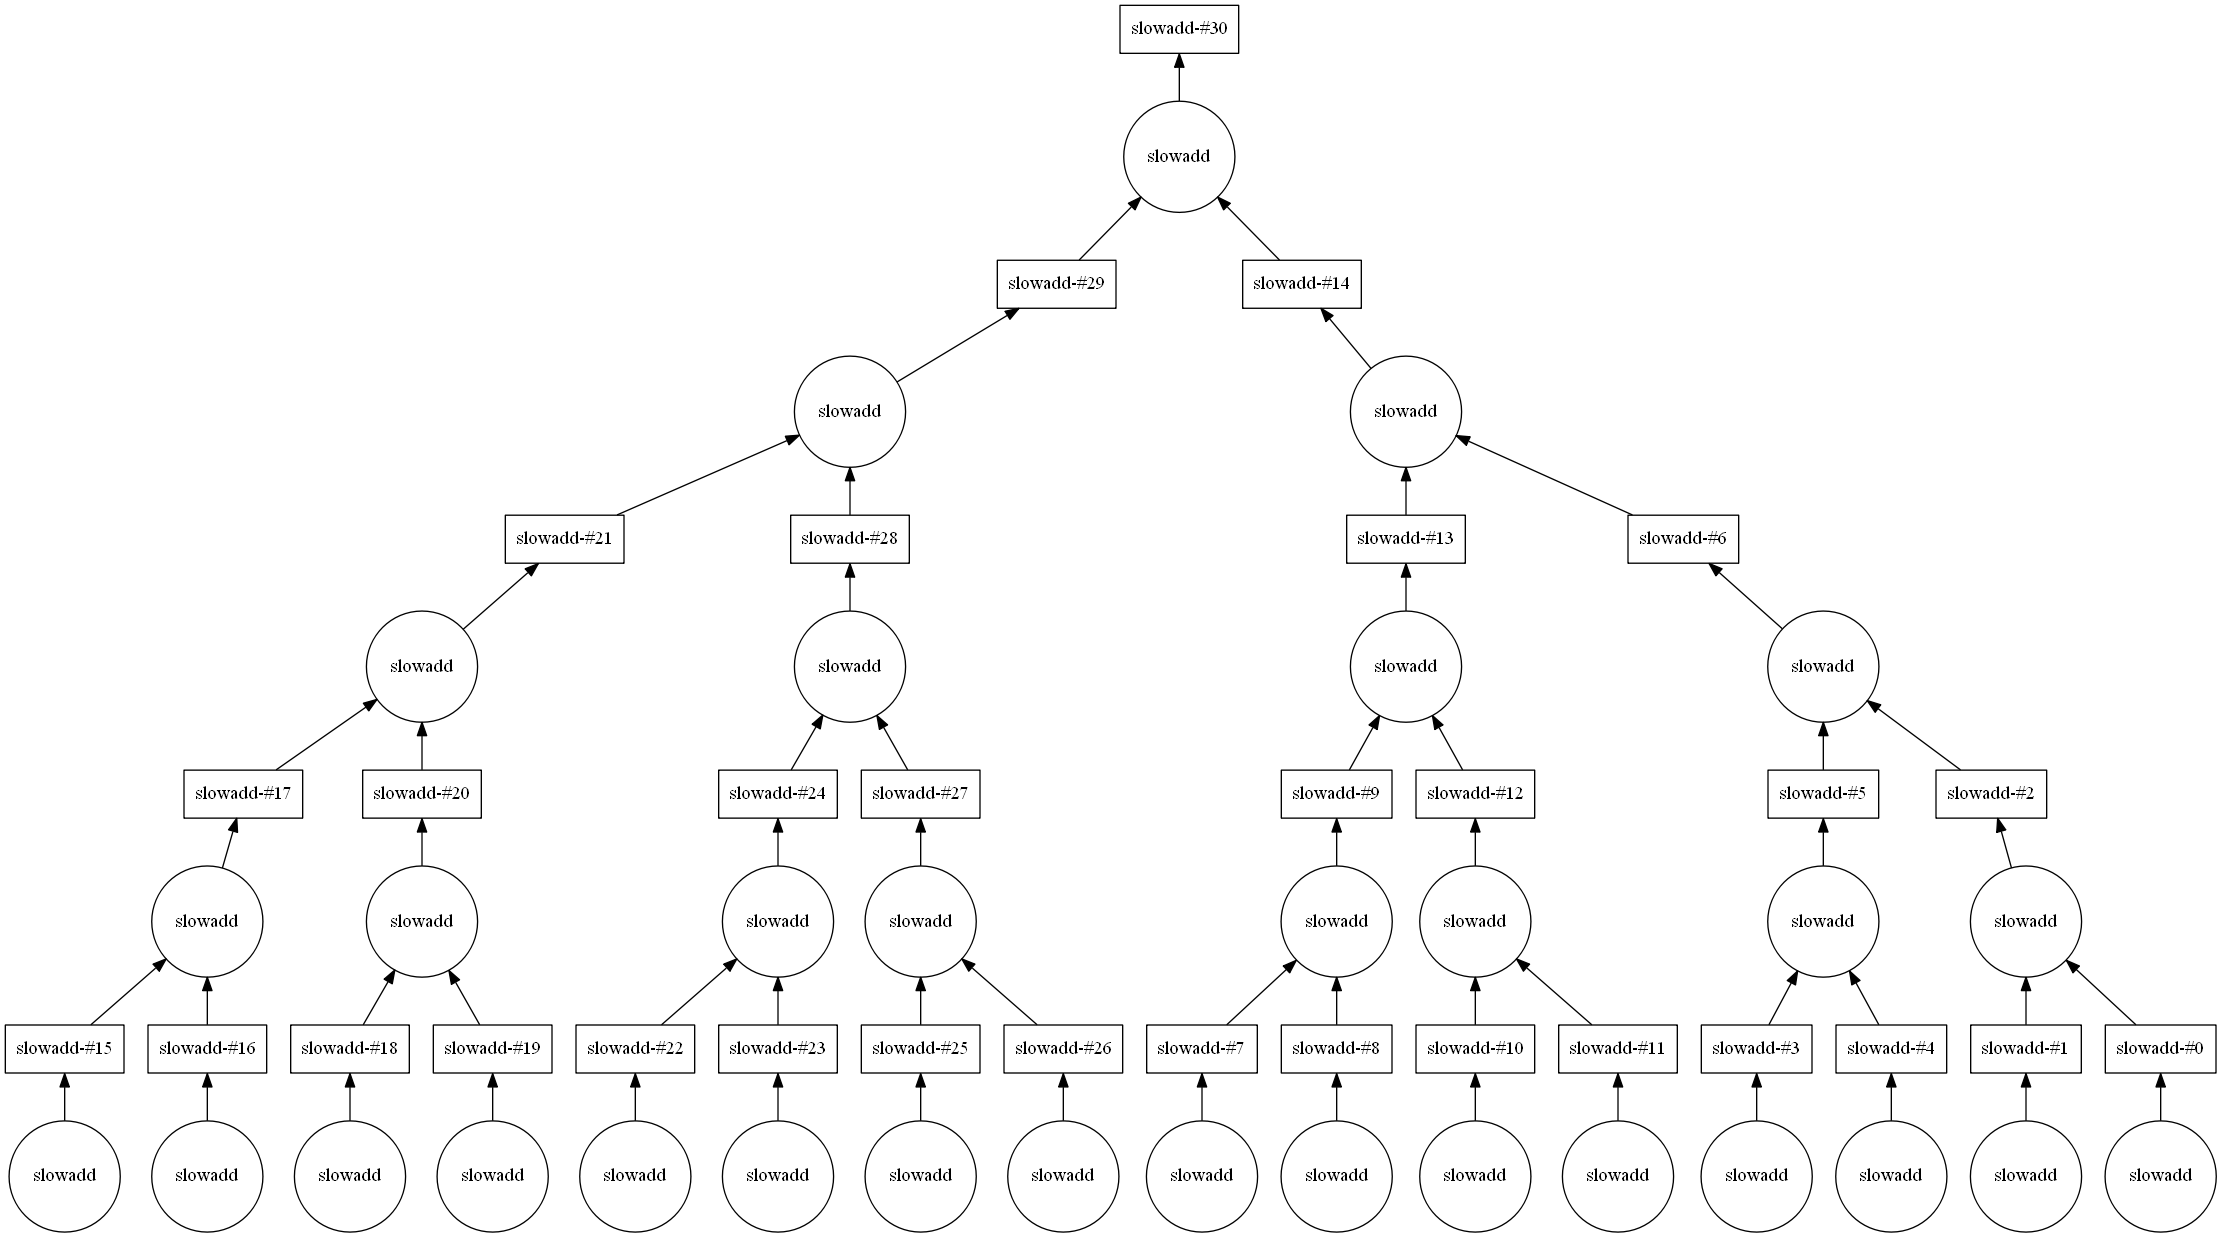

In [10]:
from dask import delayed
n=4

def slowadd(x, y, delay=0.1):
    time.sleep(delay)
    return x + y

L = range(2*7 * n)
while len(L) > 1:  # while there is more than one element left
    # add neighbors together
    L = [delayed(slowadd)(a, b) for a, b in zip(L[::2], L[1::2])]

    
L[0].visualize()

In [11]:
%%time
L[0].compute()

Wall time: 1.2 s


496

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [12]:
%%time 
L = range(2*7 * n)
while len(L) > 1:  # while there is more than one element left
    # add neighbors together
    L = [slowadd(a, b) for a, b in zip(L[::2], L[1::2])]

    
L[0]

Wall time: 5.67 s


tornado.application - ERROR - Future <tornado.concurrent.Future object at 0x0000023900EBD2E8> exception was never retrieved: Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\process.py", line 36, in _call_and_set_future
    res = func(*args, **kwargs)
  File "C:\Users\mkosturek\Anaconda3\lib\multiprocessing\process.py", line 116, in terminate
    self._popen.terminate()
  File "C:\Users\mkosturek\Anaconda3\lib\multiprocessing\popen_spawn_win32.py", line 95, in terminate
    _winapi.TerminateProcess(int(self._handle), TERMINATE)
PermissionError: [WinError 5] Access is denied
tornado.application - ERROR - Future <tornado.concurrent.Future object at 0x000002397279F630> exception was never retrieved: Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\process.py", line 36, in _call_and_set_future
    res = func(*args, **kwargs)
  File "C:\Users\mkosturek\Anaconda3\lib\multiprocessing\proc